# Jsute un notebook pou regarder les bases dispo et leur configuration

In [2]:
import geopandas
import numpy as np 

In [8]:
data_ezzor=geopandas.read_file(r'C:\Users\morga\Documents\GitHub\satellite_imagery\data\UNITAR_data\Ezzor_deirezzor_assessment_2017\Damage_Sites_Deir_ez_Zor_CDA.shp')

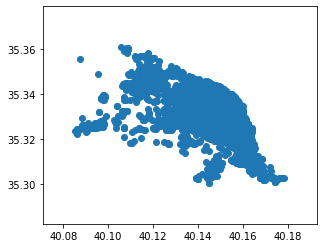

In [9]:
data_ezzor.plot()